# 이미지 증강(Image Augmentation)을 사용하여 CNN 학습

## Overfitting 대응책

In [ ]:
import warnings
warnings.filterwarnings('ignore')

- import tensorflow

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

# 1. Google Drive Mount

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 1) 구글 드라이브 마운트 결과 확인

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar 31  2021 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


## 2) unzip

In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [6]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 08:14 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 08:15 test
drwxr-xr-x 4 root root 4096 Sep 30 08:15 train
drwxr-xr-x 4 root root 4096 Sep 30 08:15 validation


## 3) [Optional] Image Augmentation Test

- rotation_rane = 40 : 0~40도 사이에서 임의의 각도록 회전
- width_shitf_range = 0.2 : 20% 픽셀 내외로 좌우 이동
- height_shift_range = 0.2 : 20% 픽셀 내외로 상하 이동
- shear_ragne = 0.2: 0.2라디안 내외로 시계 반대방향으로 변형
- zoom_rage = 0.2 : 80%~ 120% 범위에서 확대/축소
- horizontal_flip = True : 수평방향 뒤집기
- vertical_flip = True : 수직방향 뒤집기
- fill_mod = 'nearest':주변 픽셀로 이미지 채우기

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')

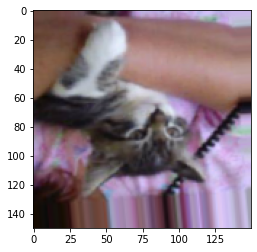

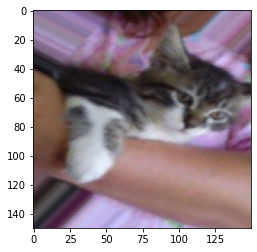

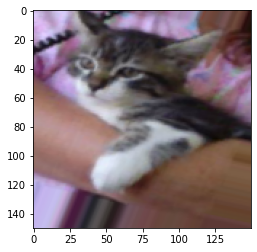

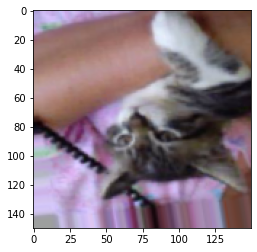

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_cats_dir = train_dir = os.path.join('train','cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# test 이미지 선택
img_path = fnames[77]

# 이미지 읽고 크기 변경
img = image.load_img(img_path, target_size = (150,150))

#(150,150,3) 배열 변환
x = image.img_to_array(img)

#(1, 150,150,3) 변환
x = x.reshape((1,) + x.shape)

# 랜덤하게 변환된 이미지 배치 생성
i = 0

for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break

plt.show()

# 2. Data Preprocessing

## 1) Image_File Driectory Setting

- train_dir
- valid_dir
- test_dir

In [10]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

## 2) ImageDataGenerator() & flow_from_directory()

In [13]:
#with Augmentation

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

# without Augmentation

valid_datagen = ImageDataGenerator(rescale=1./255)

# with Augmentation

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

# without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                    valid_dir,
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. CNN Keras Modeling

## 1) Model Define

In [15]:
# Feature Extraction & Classification
    # Dropout Layer

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

## 2) Model Compile

In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## 3) Model Fit



In [19]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 54s 218ms/step - loss: 0.7006 - accuracy: 0.5100 - val_loss: 0.6867 - val_accuracy: 0.5050
Epoch 2/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6906 - accuracy: 0.5125 - val_loss: 0.6680 - val_accuracy: 0.5620
Epoch 3/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6797 - accuracy: 0.5600 - val_loss: 0.6864 - val_accuracy: 0.5220
Epoch 4/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6790 - accuracy: 0.5420 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 22s 215ms/step - loss: 0.6940 - accuracy: 0.4985 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6931 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 -

## 4) 학습 결과 시각화

- Loss Visualization

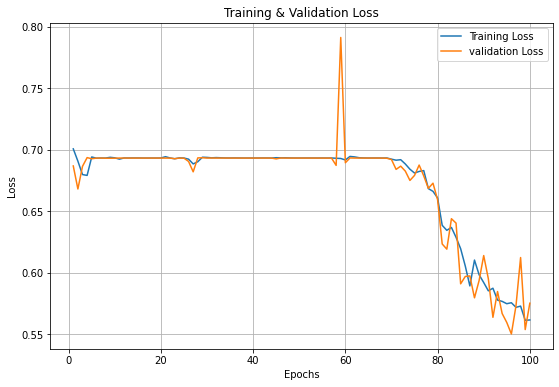

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title("Training & Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'validation Loss'])
plt.grid()
plt.show()

- Accuracy Visualization

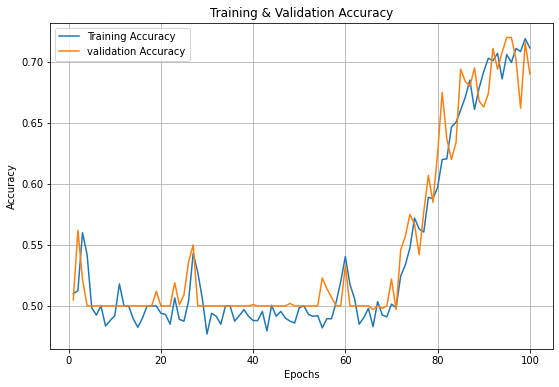

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])
plt.title("Training & Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'validation Accuracy'])
plt.grid()
plt.show()

## 5) Model Evaluate

-test_generator

In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


- Loss & Accuracy

In [24]:
loss, accuracy = model.evaluate(test_generator, steps = 50)

print('loss = {:.5f}'.format(loss))
print('accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 68ms/step - loss: 0.6064 - accuracy: 0.6680
loss = 0.60644
accuracy = 0.66800


# 4. Model Save & Load to Google Drive


## 1) Google drive Mount

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) Model Save

In [26]:
model.save('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 81088
-rw------- 1 root root    34600 Sep 28 08:10 001_Model_iris.h5
-rw------- 1 root root 41498696 Sep 30 07:41 002_dogs_and_cats_small.h5
-rw------- 1 root root 41499632 Sep 30 09:23 003_dogs_and_cats_augmentation.h5


## 3) Model Load

In [27]:
from tensorflow.keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))


50/50 [==============================] - 4s 69ms/step - loss: 0.6064 - accuracy: 0.6680
Loss = 0.60644
Accuracy = 0.66800


# THE END